<h2>Machine Learning and Econometrics<h2>

### Reference
- [UBC DSCI 100 Textbook](https://datasciencebook.ca/)
- [UBC ECON 323 Textbook](https://datascience.quantecon.org/index.html#)

In [1]:
# Run this cell if you are using R to install the necessary packages for the course
preliminary_packages <- c("tidyverse", "tidymodels", "ggplot2", "dplyr", "stargazer")
install.packages(preliminary_packages)

Installing packages into 'C:/Users/Kaiyan Zhang/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked
package 'tidymodels' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Kaiyan Zhang\AppData\Local\R\win-library\4.4\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\Kaiyan Zhang\AppData\Local\R\win-library\4.4\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"


package 'stargazer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kaiyan Zhang\AppData\Local\Temp\RtmpiG3X3B\downloaded_packages


In [2]:
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(dplyr)
library(stargazer)

Warning message:
"package 'tidyverse' was built under R version 4.4.2"
Warning message:
"package 'ggplot2' was built under R version 4.4.2"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'tidymodels' was built under R version 4.4.2"
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.

### **Machine Learning and Linear Regression**

**Machine Learning (ML)** is a field of study combining the study of statistical algorithms and artificial intelligence.

The question: 
> "How can computers learn to solve problems without being explicitly programmed?" -- Arthur Samuel (1959)

The answer:

Let computers learn from data and **generalize** to unseen data, and thus perform tasks without explicit instructions.

#### Supervised and Unsupervised Machine Learning
- **Supervised learning:** Trained with built mathematical model of a set of data that contains both the inputs and desired outputs. 
    - **Regression** and **classification** analysis belong to this category.

- **Unsupervised learning:** It finds structures in data that has not been labeled, classified or categorized. 
    - A typical example of this category is **clustering**.

#### Machine Learning and Econometrics
Traditionally, econometrics has been viewed as more **inference**-oriented, while machine learning focuses more on **prediction**.

*Differences of Econometrics and Machine Learning*
|             | Econometrics              | Machine Learning           |
|-------------|---------------------------|----------------------------|
| Goal        | Causal inference          | Prediction                 |
| Data        | Small, structured         | Large, often unstructured  |
| Assumptions | Strict                    | Flexible                   |
| Focus       | Parameter interpretations | Correctness of predictions |

But as machine learning applications expand, there is an increasing crossover between the two fields. On the one hand, machine learning is focusing more and more on causality; on the other hand, econometrics is increasingly applying machine learning methods for economic forecasting and related research.


The difference can be illustrated by an example using the `mtcar` dataset:

| Column | Name       | Description                          |
|--------|------------|--------------------------------------|
| 1      | mpg        | Miles/(US) gallon                   |
| 2      | cyl        | Number of cylinders                 |
| 3      | disp       | Displacement (cu.in.)               |
| 4      | hp         | Gross horsepower                    |
| 5      | drat       | Rear axle ratio                     |
| 6      | wt         | Weight (1000 lbs)                   |
| 7      | qsec       | 1/4 mile time                       |
| 8      | vs         | Engine (0 = V-shaped, 1 = straight) |
| 9      | am         | Transmission (0 = automatic, 1 = manual) |
| 10     | gear       | Number of forward gears             |

#### 

In [3]:
car_data <- tibble(mtcars)

head(car_data)

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


Let's visualize the data with a simple scatterplot to make it more straightforward.

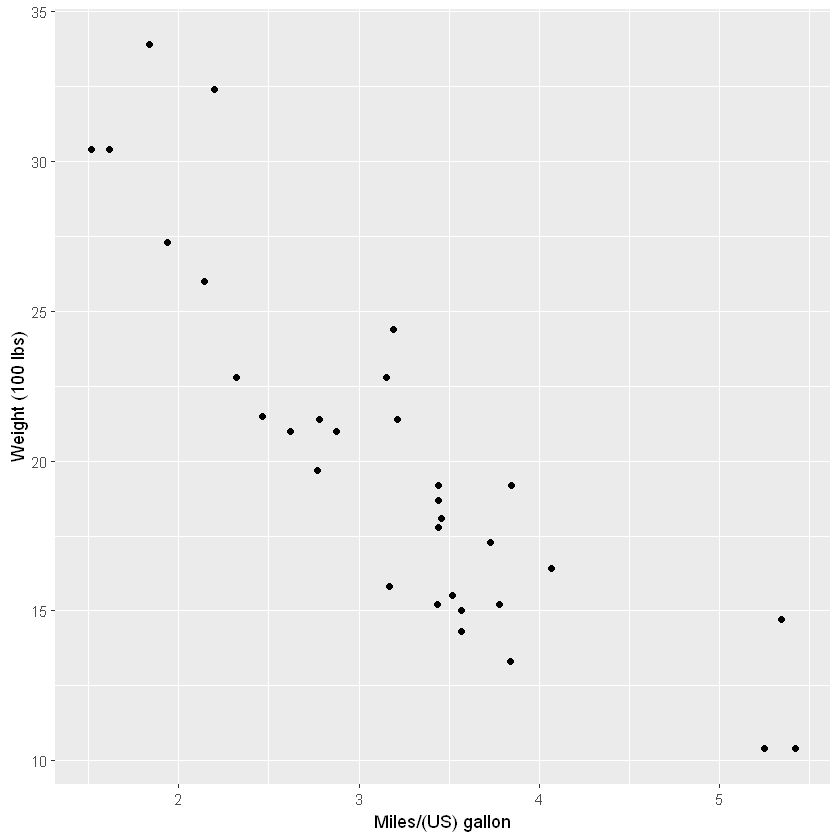

In [42]:
ggplot(car_data) + geom_point(aes(x = wt, y = mpg)) + xlab("Miles/(US) gallon") + ylab("Weight (100 lbs)")

In the econometrics approach, we specifically want to study the relationship between Miles/(US) gallon and Weight of the car by fitting the data to a linear model, and make inference about its coefficients. A simple model could take the form:
$$
MPG_i = \beta_0 + \beta_1 WT_i + \epsilon_i
$$

In [4]:
econ_model0 <- lm(mpg ~ wt, data = car_data)

summary(econ_model0)


Call:
lm(formula = mpg ~ wt, data = car_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


We would also want to capture more of the variation by adding explanatory variables. The model could take the form:
$$
MPG_i = \beta_0 + \beta_1 WT_i + \beta_2 HP_i + \beta_3 VS + \beta_4 AM + \epsilon_i
$$

In [5]:
econ_model1 <- lm(mpg ~ wt + hp + vs + am, data = car_data)

summary(econ_model1)


Call:
lm(formula = mpg ~ wt + hp + vs + am, data = car_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6710 -1.7876 -0.3044  1.2895  5.3296 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 31.07879    3.39277   9.160    9e-10 ***
wt          -2.59100    0.91740  -2.824   0.0088 ** 
hp          -0.03010    0.01094  -2.751   0.0105 *  
vs           1.78555    1.32714   1.345   0.1897    
am           2.41714    1.37938   1.752   0.0911 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.502 on 27 degrees of freedom
Multiple R-squared:  0.8499,	Adjusted R-squared:  0.8277 
F-statistic: 38.23 on 4 and 27 DF,  p-value: 9.445e-11


In [6]:
stargazer(econ_model0, econ_model1, type = "text", single.row = TRUE)


                                 Dependent variable:             
                    ---------------------------------------------
                                         mpg                     
                             (1)                    (2)          
-----------------------------------------------------------------
wt                    -5.344*** (0.559)      -2.591*** (0.917)   
hp                                            -0.030** (0.011)   
vs                                             1.786 (1.327)     
am                                             2.417* (1.379)    
Constant              37.285*** (1.878)      31.079*** (3.393)   
-----------------------------------------------------------------
Observations                  32                     32          
R2                          0.753                  0.850         
Adjusted R2                 0.745                  0.828         
Residual Std. Error    3.046 (df = 30)        2.502 (df = 27)    
F Statist

By analyzing the regression outputs, we draw our conclusions on how our outcome variable and explanatory variable correlate.

The Machine Learning approach, on the other hand, is more about "How accurate our prediction of MPG may be, given information of other regressors". Therefore, we would split the data into a training set and a test set, or validate our model with methods such as cross validation.

In [10]:
set.seed(114514)

car_split <- initial_split(car_data, prop = 0.75)
training_data <- training(car_split)
testing_data <- testing(car_split)

We would train our model with the training data, and test its accuracy with the testing data.

In [33]:
ml_model0 <- lm(mpg ~ wt, data = training_data)

test_result0 <- ml_model0|>
    predict(testing_data)|>
    bind_cols(testing_data)|>
    rename(prediction = 1)|>
    metrics(truth = mpg, estimate = prediction)

test_result0


New names:
• `` -> `...1`


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2.1033513
rsq,standard,0.8906954
mae,standard,1.6574335


We can try to improve the prediction quality by fitting more variables.

In [37]:
ml_model1 <- lm(mpg ~ wt + cyl + disp + hp, data = training_data)

test_result1 <- ml_model1|>
    predict(testing_data)|>
    bind_cols(testing_data)|>
    rename(prediction = 1)|>
    metrics(truth = mpg, estimate = prediction)

test_result1

New names:
• `` -> `...1`


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2.0890541
rsq,standard,0.8567808
mae,standard,1.7441279


As we expected, by introducing new regressors, our rmse decreased (by a little, but still an improvement). But, we particularly want to avoid **overfitting** because it will harm our prediction quality.

### **Stepwise Selection Algorithm**

In econometrics, we usually use small and structured data to solve specific, theory-based questions, so we can select which variables to use in our model based on theory or tests and give justifications easily. However, this may be untrue for machine learning. In situations where we are dealing with large, messy data that we have small theoretic knowledge about it, we will have to rely on some selection method.

#### Forward Selection
In this selection method, we start with a model containing no predictors (empty model) and iteratively add the most statistically significant variables until no improvement is observed.


#### Backward Elimination
In this selection method, we start with a model including all predictors and iteratively remove the least statistically significant variables until the model no longer improves.

#### Stepwise Selection
In this selection method, we combine forward selection and backward elimination, and evaluate the contribution of a variable at each step.


**Note: Always be cautious when using these algorithms.**

Stepwise selections may lead to overfitting or underfitting, because:
1. The tests are biased since they are based on the same data.
2. The selection methods may result in over-simplications of the real model of the data.

Meanwhile, when we have enough theoretical knowledge of the data, we may realize the selection of variables based exclusively on a single statistical criterion may be meaningless.

Solution (If we have to use them): Performing **cross validation** while selecting independent variables.

##### **Code implementaion of stepwise selection in R**

### **Linear Regression and Neural Network**

### **Overfitting and Regularization**

### **Random Forest Algorithm**

### **Partially Linear Regression**

### **L1 and L2 Regularizations**